In [41]:
import pandas as pd
import re
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from collections import Counter
import matplotlib.pyplot as plt



In [42]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Printing top 5 rows of data
df = pd.read_csv("D:\Story-Spark-AI\Python_Practice\data analysis\children_books.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Hp\AppData\Local\Temp\ipykernel_7084\3826083902.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("D:\Story-Spark-AI\Python_Practice\data analysis\children_books.csv")


,Title,Author,Desc,Inerest_age,Reading_age
0,The Girl Who Drank the Moon,Kelly Barnhill,"Every year, the evil Protectorate offers a bab...",10-14,10-14
1,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
2,Girl Out of Water,Nat Luurtsema,Lou Brown's swimming ambitions sank without tr...,13-18,10+
3,Captive,A J Grainger,Robyn is scared. Ever since the attempted assa...,13+,13
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,Welcome to the School of Music. In charge is M...,10+,10+


In [ ]:
#Checking size of data(rows and columns)
df.shape

(3096, 5)

In [ ]:
#Checking Basic information about data such as datatype, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3269 non-null   object
 1   Author       3096 non-null   object
 2   Desc         3269 non-null   object
 3   Inerest_age  3269 non-null   object
 4   Reading_age  3269 non-null   object
dtypes: object(5)
memory usage: 127.8+ KB


In [33]:
#Renaming Column name
df.rename(columns={
    'Inerest_age': 'interest_age',
    'Desc': 'description'
}, inplace=True)


In [35]:
df.columns

Index(['Title', 'Author', 'description', 'interest_age_range',
       'reading_age_range'],
      dtype='object')

In [ ]:
#Removing Row with missing values in Author Column
df = df.dropna(subset=['Author'])


In [34]:
print(df.isnull().sum())


Title                 0
Author                0
description           0
interest_age_range    0
reading_age_range     0
dtype: int64


In [19]:
print(df['interest_age'].unique()[:50])


['10-14 ' '13+ ' '13-18 ' '10+ ' '12+ ' '14+ ' '13-15 ' '11+ ' '8+ '
 '10-12 ' '9+ ' '7+ ']


In [20]:
print(df['Reading_age'].unique()[:50])


['10-14                               '
 '12+                               ' '10+                               '
 '13                               ' '8+                               '
 '13+                               ' '11+                               '
 '14+                               '
 '10-12                               '
 '9+                               ']


In [22]:
df['Reading_age'] = df['Reading_age'].str.strip()


C:\Users\Hp\AppData\Local\Temp\ipykernel_7084\103248340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reading_age'] = df['Reading_age'].str.strip()


In [23]:
print(df['Reading_age'].unique()[:50])


['10-14' '12+' '10+' '13' '8+' '13+' '11+' '14+' '10-12' '9+']


In [26]:
def to_range_format(age_str):
    if pd.isna(age_str):
        return None
    age_str = age_str.strip()
    
    # If x-y, leave as is
    if '-' in age_str:
        return age_str
    
    # If x+ or x, convert to x-(x+2)
    num = int(re.findall(r'\d+', age_str)[0])
    return f"{num}-{num+2}"

In [ ]:
df['reading_age_range'] = df['Reading_age'].apply(to_range_format)


C:\Users\Hp\AppData\Local\Temp\ipykernel_7084\825567693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interest_age_range'] = df['interest_age'].apply(to_range_format)
C:\Users\Hp\AppData\Local\Temp\ipykernel_7084\825567693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reading_age_range'] = df['Reading_age'].apply(to_range_format)


In [ ]:
print(df['reading_age_range'].unique())


['10-14' '12-14' '10-12' '13-15' '8-10' '11-13' '14-16' '9-11']


In [ ]:
df = df.drop(columns=['interest_age', 'reading_age'])


In [40]:
df.head()

,Title,Author,description,reading_age_range
0,The Girl Who Drank the Moon,Kelly Barnhill,"Every year, the evil Protectorate offers a bab...",10-14
1,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,12-14
2,Girl Out of Water,Nat Luurtsema,Lou Brown's swimming ambitions sank without tr...,10-12
3,Captive,A J Grainger,Robyn is scared. Ever since the attempted assa...,13-15
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,Welcome to the School of Music. In charge is M...,10-12


In [43]:
STOPWORDS = set(stopwords.words('english'))

In [44]:
# Clean description text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    return text.lower().strip()

df['clean_description'] = df['description'].apply(clean_text)

In [45]:
# Convert descriptions into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5)
X = vectorizer.fit_transform(df['clean_description'])

In [46]:
# Use NMF to extract latent topics
n_topics = 8
nmf = NMF(n_components=n_topics, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_

d:\Story-Spark-AI\venv\Lib\site-packages\sklearn\decomposition\_nmf.py:1728: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [47]:
terms = vectorizer.get_feature_names_out()


In [48]:
# Function to show top words per theme
def show_topics(H, terms, num_words=10):
    for i, topic in enumerate(H):
        top_words = [terms[j] for j in topic.argsort()[:-num_words - 1:-1]]
        print(f"Theme {i+1}: {' | '.join(top_words)}\n")



In [49]:
show_topics(H, terms)

Theme 1: year | feels | amy | ambers | life | roger | grief | bennett | fall | friend

Theme 2: people | strange | frank | school | bullied | fun | huge | nick | families | genre

Theme 3: frankenstein | human | dramatic | version | new | victor | creature | monster | monstrous | man

Theme 4: mary | meg | queen | scots | jenny | court | historical | young | intrigue | french

Theme 5: london | cole | vividly | rory | away | play | shakespeare | new | series | east

Theme 6: ro | time | charley | way | hawke | book | robyn | doesnt | mother | just

Theme 7: father | dory | novel | zan | ben | oppel | bens | cassandra | sister | existence

Theme 8: caz | lake | feeling | frozen | district | spirit | local | end | landscape | grief



In [50]:
# Function to extract nouns from text
def extract_nouns(text):
    tokens = [w for w in word_tokenize(text) if w.isalpha()]
    tokens = [w.lower() for w in tokens if w not in STOPWORDS]
    tags = pos_tag(tokens)
    return [word for (word, tag) in tags if tag.startswith('NN')]


In [51]:
# Apply to descriptions
df['nouns'] = df['clean_description'].apply(extract_nouns)

In [52]:
# Flatten list and count frequency
all_nouns = [n for nouns in df['nouns'] for n in nouns]
noun_counts = Counter(all_nouns)

In [53]:
# Show top 20 nouns
print(noun_counts.most_common(20))

[('life', 1763), ('school', 1585), ('story', 1337), ('book', 1226), ('time', 1139), ('things', 1057), ('world', 977), ('family', 888), ('readers', 797), ('people', 797), ('something', 626), ('characters', 622), ('friend', 621), ('man', 535), ('friendship', 534), ('series', 532), ('mother', 529), ('ro', 528), ('way', 527), ('year', 447)]


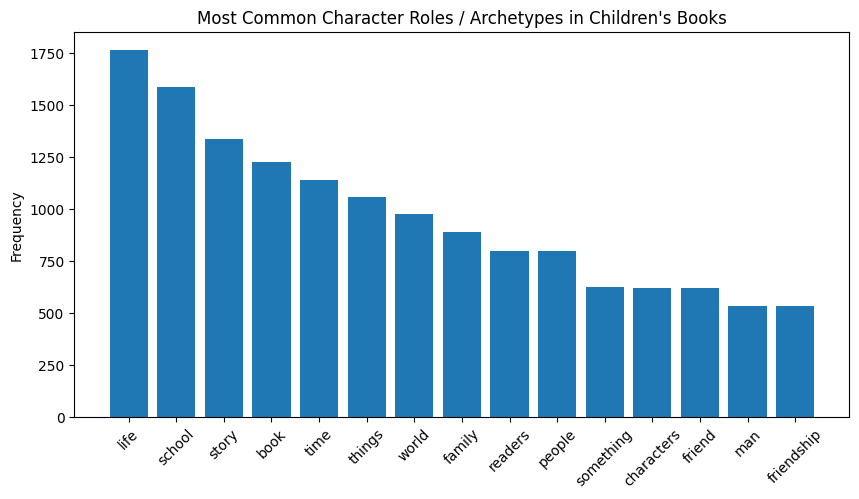

In [54]:
top_nouns = dict(noun_counts.most_common(15))
plt.figure(figsize=(10,5))
plt.bar(top_nouns.keys(), top_nouns.values())
plt.xticks(rotation=45)
plt.title("Most Common Character Roles / Archetypes in Children's Books")
plt.ylabel("Frequency")
plt.show()
